In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path = "C:/Users/Krishna/Downloads/3.png"
img = Image.open(image_path)
img = img.convert('L')
image_array = np.array(img)

In [3]:
#HERE I AM FINDING THE COORDINATES OF THE WHITE POINTS
threshold = 200
illuminated_points = np.column_stack(np.where(image_array > threshold))

In [4]:
max_iterations = 100
tolerance = 0.0001
max_k = 10 
inertias = []

In [5]:
for k in range(1, max_k + 1):
    indices = np.random.choice(illuminated_points.shape[0], k, replace=False)
    centroids = illuminated_points[indices]
    
    for _ in range(max_iterations):
        old_centroids = centroids
        
        distances = np.linalg.norm(illuminated_points[:, np.newaxis] - centroids, axis=2)
        assignments = np.argmin(distances, axis=1)
        
        centroids = np.array([illuminated_points[assignments == i].mean(axis=0) for i in range(k)])
        if np.linalg.norm(centroids - old_centroids) < tolerance:
            break
    
    inertia = sum(np.min(distances, axis=1)**2)
    inertias.append(inertia)

C:\Users\Krishna\AppData\Local\Temp\ipykernel_11744\2522848382.py:11: RuntimeWarning: Mean of empty slice.
  centroids = np.array([illuminated_points[assignments == i].mean(axis=0) for i in range(k)])
C:\Users\Krishna\anaconda3\anacoo\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


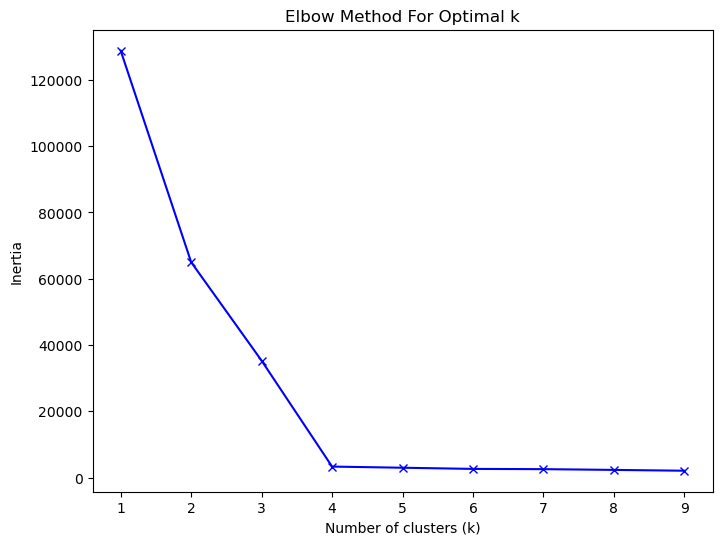

In [6]:
# HERE I AM PLOTTING ELBOW CURVE
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [15]:
# FROM TH EGRAPH
optimal_k = 4

In [8]:
indices = np.random.choice(illuminated_points.shape[0], optimal_k, replace=False)
centroids = illuminated_points[indices]

In [9]:
for _ in range(max_iterations):
    old_centroids = centroids
    
    distances = np.linalg.norm(illuminated_points[:, np.newaxis] - centroids, axis=2)
    assignments = np.argmin(distances, axis=1)
    
    centroids = np.array([illuminated_points[assignments == i].mean(axis=0) for i in range(optimal_k)])
    if np.linalg.norm(centroids - old_centroids) < tolerance:
        break

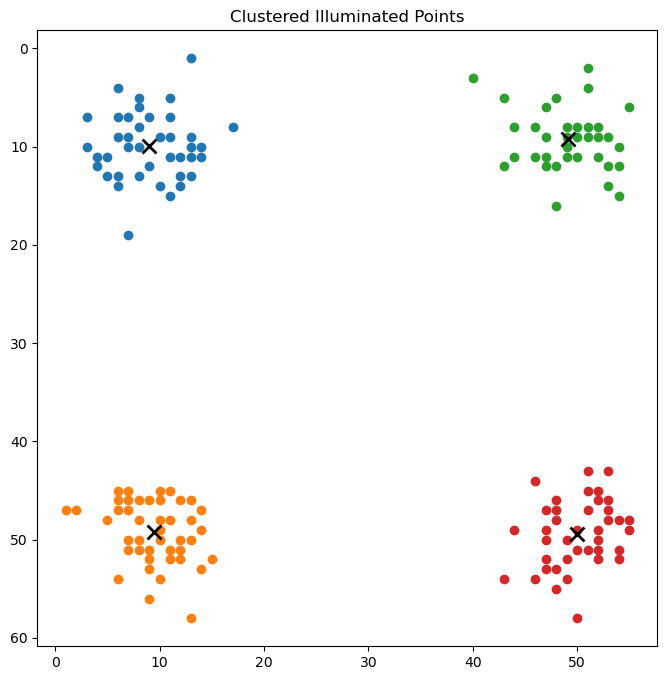

In [10]:
# HERE I AM PLOTTING THE CENTROID
unique_labels = np.unique(assignments)
plt.figure(figsize=(8, 8))
for label in unique_labels:
    class_member_mask = (assignments == label)
    xy = illuminated_points[class_member_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markersize=6)
plt.plot(centroids[:, 1], centroids[:, 0], 'kx', markeredgewidth=2, markersize=10)
plt.gca().invert_yaxis()
plt.title('Clustered Illuminated Points')
plt.show()

In [11]:
centroid_distances = np.zeros((optimal_k, optimal_k))
for i in range(optimal_k):
    for j in range(i + 1, optimal_k):
        dist = np.linalg.norm(centroids[i] - centroids[j])
        centroid_distances[i, j] = dist
        centroid_distances[j, i] = dist

In [12]:
print("Distances between centroids:")
for i in range(optimal_k):
    for j in range(i + 1, optimal_k):
        print(f"Distance between centroid {i} and centroid {j}: {centroid_distances[i, j]}")

Distances between centroids:
Distance between centroid 0 and centroid 1: 39.26127537043108
Distance between centroid 0 and centroid 2: 40.12383970602891
Distance between centroid 0 and centroid 3: 56.88709392336739
Distance between centroid 1 and centroid 2: 56.33996168099006
Distance between centroid 1 and centroid 3: 40.607414812899215
Distance between centroid 2 and centroid 3: 40.13718174992815
